In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
cd Desktop/DataSets/McDonalds-Analysis-master

/Users/AlanKim/Desktop/DataSets/McDonalds-Analysis-master


In [3]:
menu = pd.read_excel('mcdonaldsmenu.xlsx', sheet_names = "mcdonaldsmenu")
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
menu.isnull().any()

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool

In [5]:
menu.columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

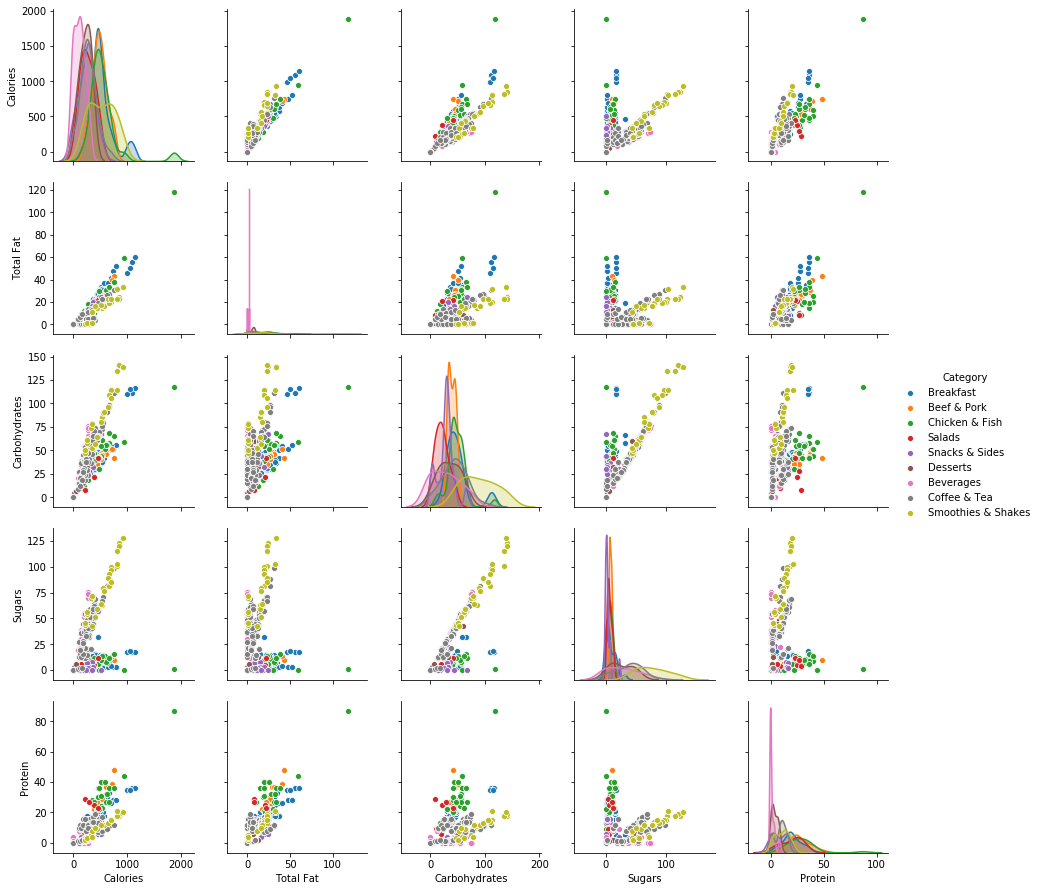

In [6]:
# Let's first see if there are any relationship between the main variables of interest.
# Purposefully shortened the number of features as pairplotting with >20 variables leads to extremely small plots.
relationship = sns.pairplot(menu, hue = "Category", vars=["Calories","Total Fat", "Carbohydrates","Sugars","Protein"])

Depending on the category of the food, it seems there are various strengths of the linear relationship displayed by the "V" or "L" shaped scatterplot. 

However, there are collective linearity on certain relationships such as Calories vs. Total Fat/Carbohydrates/Protein and Total Fat vs. Protein. 

Let's see the correlation in another approach using heatmap.

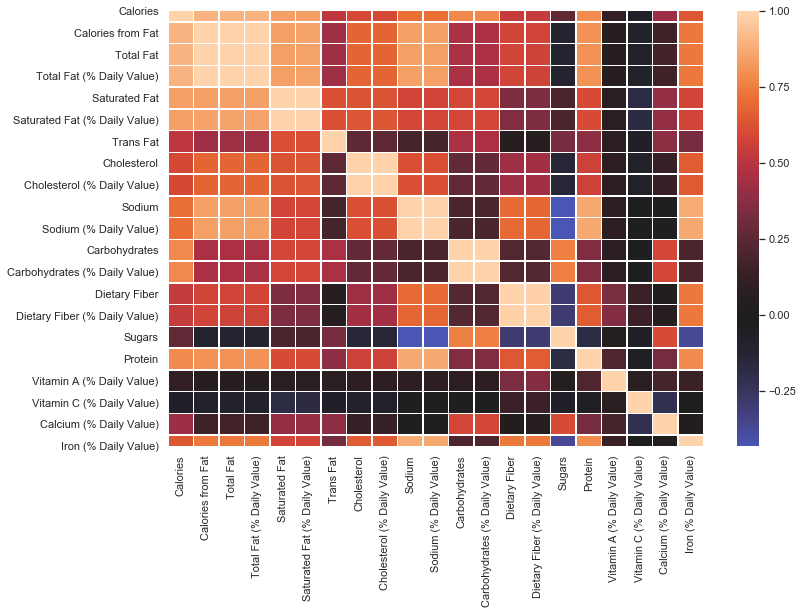

In [7]:
# Note that we did not categorize the data into food types, rather all-inclusive dataset.
corr = menu.corr()
#print(corr) 
sns.set(rc={
    'figure.figsize':(12,8),
    'font.size':8
           })
correlation = sns.heatmap(corr,vmin=round(corr.min().min(),2),vmax=1, center=0,linewidths=0.5)

The heatmap displays quite contradictory results. Note how the correlation between sugars and calories is weak (~0.25). However, the pairplot suggested a linear relationship for the Smoothies & Shakes category. Why is that?

Clearly, the heatmap was all inclusive of every item in the menu dataset. Therefore, a good portion of the items were sandwiches, burgers, fries, and etc. that were low in sugar but still high in calories. From such observation, one can conclude that the majority of the calories for those items come from other sources such as complex carbohydrates, proteins, and fat. On the other hand, Shakes & Smoothies contains much more sugar relative to the "protein/fat-dense" foods, therefore, much of their calories should come from sugars.

Notice the correlation between carbohydrates and calories is quite strong. Isn't sugar a form of carbohydrate? It is. However, the sugar in nutrition label is referring to forms of carbohydrate that come from either natural or refined sugars such as sucrose, fructose, and, primarily for shakes and smoothies, lactose. They add sugar to the total carbohydrate content. Remember, sandwiches and burgers have buns.

# Smoothies and Shakes Analysis

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,531.428571,127.678571,14.125000,21.714286,8.375000,41.785714,0.535714,45.000000,14.714286,183.571429,...,90.428571,30.142857,1.464286,5.750000,77.892857,10.857143,18.750000,6.964286,35.571429,3.964286
std,230.871365,93.209066,10.371457,15.848489,6.335709,31.687545,0.489304,32.289202,10.793884,110.887473,...,30.887404,10.229638,1.400586,5.386024,25.772997,6.132574,13.096861,13.267845,21.753550,4.041288
min,210.000000,5.000000,0.500000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,40.000000,...,47.000000,16.000000,0.000000,0.000000,43.000000,2.000000,0.000000,0.000000,6.000000,0.000000
25%,337.500000,10.000000,1.000000,2.000000,0.500000,3.000000,0.000000,5.000000,2.000000,63.750000,...,61.750000,20.750000,0.000000,0.000000,55.500000,4.000000,10.000000,0.000000,10.000000,0.000000
50%,540.000000,150.000000,16.000000,25.000000,10.000000,50.000000,0.750000,52.500000,18.000000,195.000000,...,88.000000,29.500000,1.000000,5.000000,74.500000,12.000000,20.000000,0.000000,40.000000,2.000000
75%,692.500000,202.500000,23.000000,35.000000,13.250000,65.250000,1.000000,75.000000,24.000000,260.000000,...,114.000000,38.000000,2.000000,8.250000,97.750000,15.000000,26.250000,4.000000,50.000000,6.500000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.000000,90.000000,30.000000,400.000000,...,141.000000,47.000000,5.000000,19.000000,128.000000,21.000000,50.000000,45.000000,70.000000,15.000000


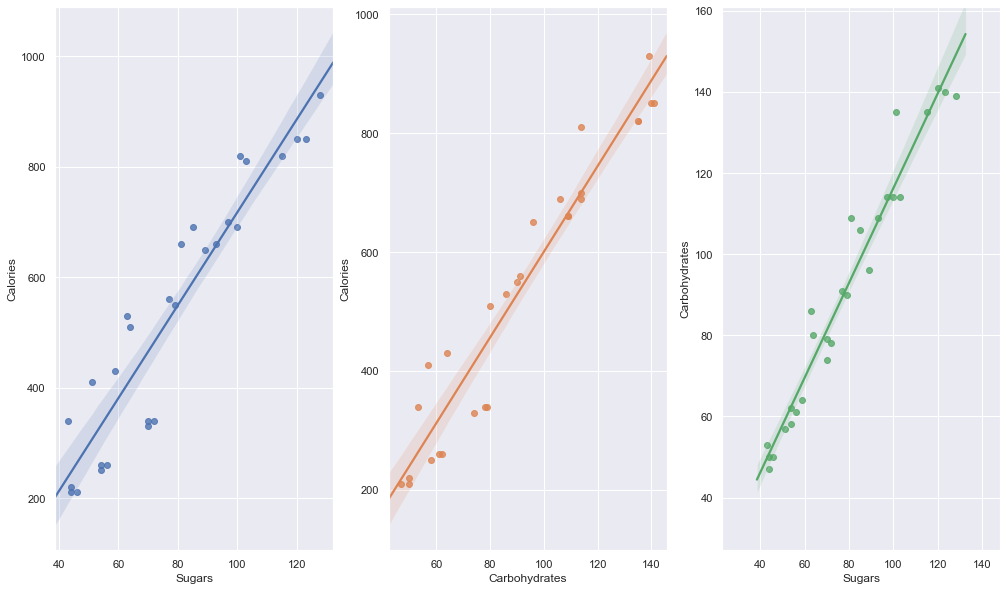

In [8]:
# To prove my point, I created a dataframe that only contains smoothies and shakes and plotted the linear regression.
sugars = menu[menu['Category'] == 'Smoothies & Shakes']
fig, axes = plt.subplots(ncols=3, figsize=(15,10))
plt.subplots_adjust(right=1)

sns.regplot(data = sugars, x = 'Sugars', y = 'Calories', ax=axes[0])
sns.regplot(data = sugars, x = 'Carbohydrates', y = 'Calories',ax=axes[1])
sns.regplot(data = sugars, x = 'Sugars', y = 'Carbohydrates',ax=axes[2])
plt.xlim(sugars['Sugars'].min()-20,sugars['Sugars'].max()+20)
plt.ylim(sugars['Carbohydrates'].min()-20,sugars['Carbohydrates'].max()+20)

sugars.describe()

As we can see from the 3 linear regressions, there are strong relationships between calories, sugars, and carbohydrates for drinks labeled as Smoothies & Shakes. In other words, sugars and carbohydrates are good predictors of the calories content for Smoothies & Shakes.

However, it would be erroneous to neglect other macronutrients that contribute to calories. We must include other variables that influence calories. 

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = sugars[['Total Fat', 'Carbohydrates', 'Protein']]
y = sugars['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state=42)

reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

print(reg.intercept_)
print(reg.coef_)

# Adding a constant column.
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

def VIF(indep_var):
    
    print("\nVariance Inflation Factor")
    vifcolumns = indep_var.columns
    for i in np.arange(0,len(vifcolumns)):
        xvars = list(vifcolumns)
        yvar = xvars.pop(i)
        mod = sm.OLS(indep_var[yvar], sm.add_constant(indep_var[xvars]))
        res = mod.fit()
        vif = 1/(1-res.rsquared)
        print(yvar, round(vif,3))

# Backward Elimination
X_all = X_train.loc[:,:]
model = sm.OLS(y_train,X_all).fit()
VIF_all = VIF(X_all)
print(VIF_all)
print(model.summary())

X_1 = X_train.loc[:,:'Carbohydrates']
model=sm.OLS(y_train, X_1).fit()
VIF_1=VIF(X_1)
print(VIF_1)
print(model.summary())

print(y_pred)


-8.814981625655264
[10.34420448  4.33348028  0.10805579]

Variance Inflation Factor
const 0.0
Total Fat 41.973
Carbohydrates 8.528
Protein 69.898
None
                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6343.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.08e-16
Time:                        15:18:18   Log-Likelihood:                -42.610
No. Observations:                  14   AIC:                             93.22
Df Residuals:                      10   BIC:                             95.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|  

Clearly, the protein was not a good predictor in the calorie content for Shakes & Smoothies. However, this does not remove the fact that there are still some proteins in the drinks, and, consequently, does contribute to the total calories. All we can conclude from this analysis is that Protein is a poor predictor of calories in Shakes & Smoothies relative to Carbs and Fat. Remember, linear regression makes the strong (but not necessarily true) assumption that the effect of changes in a predictor on the response is independent of other predictors (AKA Additive Assumption). 

Why is the adjusted R^2 value nearly perfect? The data was rigged from the jump. Backward Selection involves removing one predictor at a time from a list that contains all predictors. I only included the 3 variables thus could have (and highly likely) prematurely removed predictors that had some correlation with calories.  Furthermore, we only had 28 observations (n) and the train and test datasets were split 50/50 further reducing "n" = 14. When n is very small relative to the p value, and they are conveniently linear, then, it is easy to conclude that the relationship is strong due to overfitting. In fact, we cannot use backward selection when n<<p. 

However, from general knowledge, we knew that protein does not contribute to calories as much as Fat and Carbohydrate in Shakes & Beverages.

# Meals Analysis

In [10]:
meals = menu.loc[menu['Category'].isin(['Breakfast','Beef & Pork', 'Chicken & Fish'])].set_index('Item')
meals.columns

Index(['Category', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [11]:
# We do not need the % Daily Values of the macronutrient.
drop_columns = ['Total Fat (% Daily Value)', 'Saturated Fat (% Daily Value)', 'Cholesterol (% Daily Value)',
               'Carbohydrates (% Daily Value)', 'Dietary Fiber (% Daily Value)', 'Sodium (% Daily Value)']
meals = meals.drop(columns=drop_columns)
meals.head()

,Category,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,,,,,,,
Egg McMuffin,Breakfast,4.8 oz (136 g),300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
Egg White Delight,Breakfast,4.8 oz (135 g),250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
Sausage McMuffin,Breakfast,3.9 oz (111 g),370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
Sausage McMuffin with Egg,Breakfast,5.7 oz (161 g),450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
Sausage McMuffin with Egg Whites,Breakfast,5.7 oz (161 g),400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


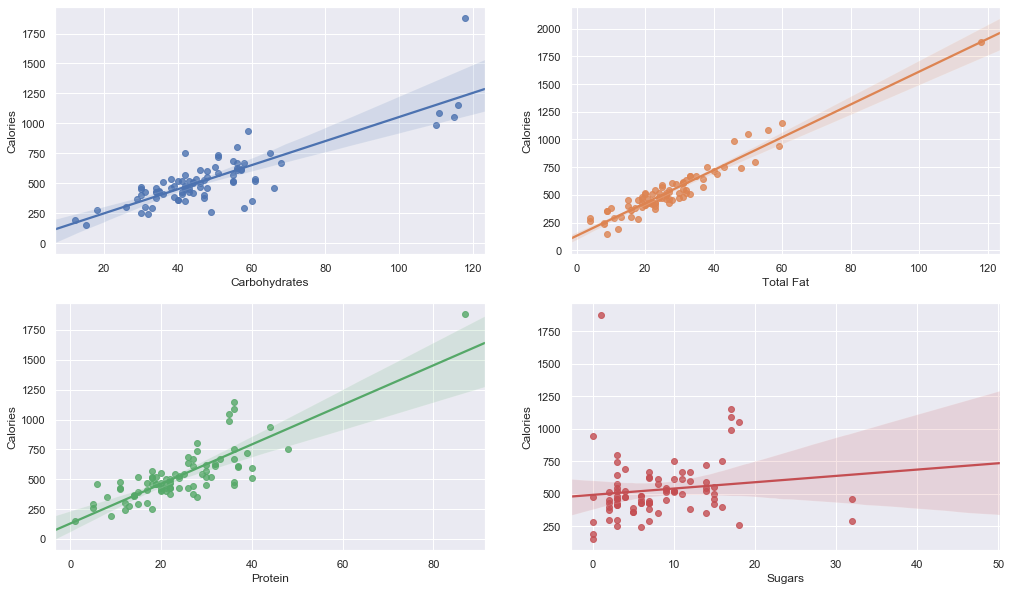

In [12]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(15,10))
plt.subplots_adjust(right=1)

sns.regplot(data = meals, x = 'Carbohydrates', y = 'Calories', ax=axes[0,0])
sns.regplot(data = meals, x = 'Total Fat', y = 'Calories',ax=axes[0,1])
sns.regplot(data = meals, x = 'Protein', y = 'Calories',ax=axes[1,0])
sns.regplot(data = meals, x = 'Sugars', y = 'Calories', ax=axes[1,1])
plt.show()

In [13]:
print([meals['Protein'].idxmax()])
print([meals['Total Fat'].idxmax()])
print([meals['Carbohydrates'].idxmax()])
print([meals['Sugars'].idxmax()])

['Chicken McNuggets (40 piece)']
['Chicken McNuggets (40 piece)']
['Chicken McNuggets (40 piece)']
['Cinnamon Melts']


Under simple linear regression, it seems that carbohydrates, protein, and total fat are all independently good predictors of calories, that is, the higher those macronutrients, the higher the calories. On the other hand, sugars is a poor predictor in total number of calories. 

Also, it is easy to notice the high leverage/outlier data point on each of the subplots. It turns out that the culprit was the portion size of the Chicken McNuggets (40 piece). We can calculate the leverage statistics to determine if there are any items that are significantly influencing the regression line. 

In [14]:
from sklearn.metrics import mean_squared_error

X2 = meals.loc[:,'Total Fat':]
y2 = meals['Calories']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size =0.3, random_state=42)

reg2 = LinearRegression()
reg2.fit(X2_train,y2_train)

y2_pred = reg2.predict(X2_test)

mse1 = mean_squared_error(y2_test,y2_pred)
print("Test mean squared error w/o model selection or regularization:", mse1)

# Adding a constant column.
X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)

model2 = sm.OLS(y2_train,X2_train).fit()
VIF2 = VIF(X2_train)
print(VIF2)
print(model2.summary())


Test mean squared error w/o model selection or regularization: 22.029564626534217

Variance Inflation Factor
const 0.0
Total Fat 21.495
Saturated Fat 14.823
Trans Fat 2.801
Cholesterol 2.796
Sodium 32.019
Carbohydrates 32.516
Dietary Fiber 5.212
Sugars 4.555
Protein 17.308
Vitamin A (% Daily Value) 1.564
Vitamin C (% Daily Value) 2.094
Calcium (% Daily Value) 3.195
Iron (% Daily Value) 9.659
None
                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.873e+04
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           7.95e-78
Time:                        15:18:20   Log-Likelihood:                -154.84
No. Observations:                  58   AIC:                             337.7
Df Residuals:                      44   BIC:   

,dfb_const,dfb_Total Fat,dfb_Saturated Fat,dfb_Trans Fat,dfb_Cholesterol,dfb_Sodium,dfb_Carbohydrates,dfb_Dietary Fiber,dfb_Sugars,dfb_Protein,dfb_Vitamin A (% Daily Value),dfb_Vitamin C (% Daily Value),dfb_Calcium (% Daily Value),dfb_Iron (% Daily Value),cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
Item,,,,,,,,,,,,,,,,,,,,
Egg McMuffin,-0.013519,0.007139,0.016084,-0.009728,-0.031991,-0.009287,0.012416,-0.037244,-0.002332,0.002335,0.015614,0.022189,0.002206,0.004328,0.000299,-0.142830,0.170480,-0.064750,-0.141827,-0.064296
Egg White Delight,-0.178917,0.277035,-0.011334,-0.181713,-0.161563,-0.035443,-0.030313,-0.457163,0.123116,-0.116366,0.163171,0.319910,-0.019843,0.307722,0.050021,-1.747272,0.186582,-0.836833,-1.773860,-0.849567
Sausage McMuffin,-0.010460,-0.224793,0.048471,0.121941,0.191836,0.055284,0.126510,-0.189913,-0.001290,0.127775,-0.063562,0.050433,-0.265754,-0.013620,0.021460,-1.151544,0.184715,-0.548121,-1.154275,-0.549421
Sausage McMuffin with Egg,0.011720,0.058512,0.006426,-0.067749,0.010245,-0.059125,-0.024405,0.034697,-0.003584,0.009065,0.036264,-0.014972,0.092250,-0.014778,0.002722,0.386458,0.203297,0.195218,0.384098,0.194026
Sausage McMuffin with Egg Whites,-0.046307,-0.060917,-0.100994,0.157437,0.136908,0.166279,0.042479,-0.213350,0.055882,-0.096190,-0.036170,0.119289,-0.193844,0.114946,0.024189,-1.357068,0.155323,-0.581934,-1.365421,-0.585516


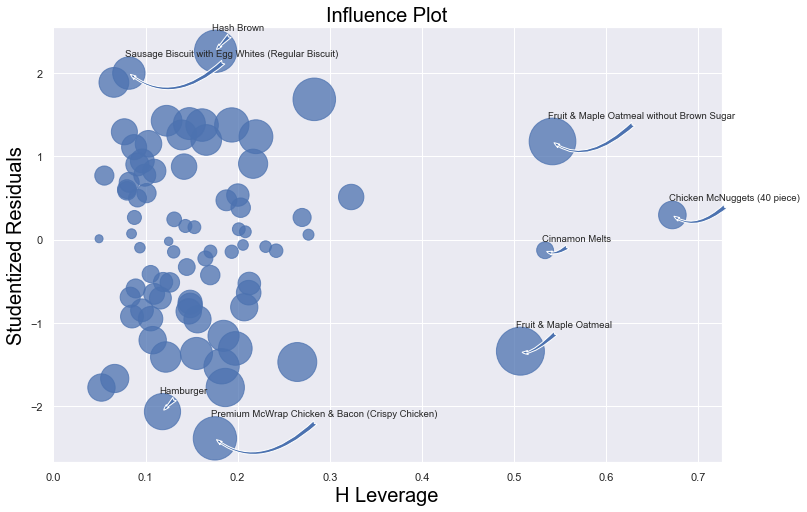

In [15]:
from statsmodels.graphics import utils
from statsmodels.compat.python import lrange, lzip

X2 = meals.loc[:,'Total Fat':]
y2 = meals['Calories']

linearmodel = sm.OLS(y2, sm.add_constant(X2)).fit()
influence = linearmodel.get_influence().summary_frame()

def _influence_plot(results, external=True, alpha=.05,
                    criterion="cooks", size=48, plot_alpha=.75, ax=None,
                    **kwargs):
    infl = results.get_influence()
    fig, ax = utils.create_mpl_ax(ax)

    if criterion.lower().startswith('coo'):
        psize = infl.cooks_distance[0]
    elif criterion.lower().startswith('dff'):
        psize = np.abs(infl.dffits[0])
    else:
        raise ValueError("Criterion %s not understood" % criterion)

    # scale the variables
    old_range = np.ptp(psize)
    new_range = size**2 - 8**2

    psize = (psize - psize.min()) * new_range/old_range + 8**2

    leverage = infl.hat_matrix_diag
    if external:
        resids = infl.resid_studentized_external
    else:
        resids = infl.resid_studentized

    from scipy import stats
    
    def _high_leverage(results):
    
        return 2. * (results.df_model + 1)/results.nobs

    cutoff = stats.t.ppf(1.-alpha/2, results.df_resid)
    large_resid = np.abs(resids) > cutoff
    large_leverage = leverage > _high_leverage(results)
    large_points = np.logical_or(large_resid, large_leverage)

    ax.scatter(leverage, resids, s=psize, alpha=plot_alpha)

    # add point labels
    labels = results.model.data.row_labels
    if labels is None:
        labels = lrange(len(resids))
    ax = utils.annotate_axes(
        np.where(large_points)[0], labels,
        lzip(leverage, resids), lzip(-(psize/2)**.2, (psize/2)**.45), "large", ax, 
        arrowprops=dict(
            arrowstyle="fancy, head_length=0.6, tail_width=0.5",
            connectionstyle="angle3,angleA=45,angleB=-40"
        )
    )

    font = {"fontsize": 20, "color": "black"}
    ax.set_ylabel("Studentized Residuals", **font)
    ax.set_xlabel("H Leverage", **font)
    ax.set_title("Influence Plot", **font)

influenceplot = _influence_plot(linearmodel, criterion = "DFFITS")
influence.head()

In [16]:
from math import sqrt
def influential_points():
    
    p = len(X2.columns)
    n= len(X2.index)
    
    influential = 2*sqrt(p/n)
    
    for i, v in enumerate(influence['dffits']):
        if abs(v) > influential:
            print(influence.index[i])

            
influential_points()

Egg White Delight
Big Breakfast with Hotcakes (Large Biscuit)
Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)
Hash Brown
Fruit & Maple Oatmeal
Fruit & Maple Oatmeal without Brown Sugar
Premium McWrap Chicken & Bacon (Crispy Chicken)


Clearly, we cannot use ordinary least squares estimator, as shown by the adjust R^2 value of 1. The linear regression is fitting our model perfectly! This is rarely the case in real life due to random error. When p > n or p =/~ n, we cannot use OLS at all due to flexibility and hence overfitting. Furthermore, notice how the high leverage or outlier items from the graph does not necessarily have an influential dffits value, and conversely, some items that did not have high leverage are influential.  This shows that the influence value obtained from the subjective, yet conventionally used cut-off equation (2*sqrt(p/n) does not efficiently determine whether the data is, in fact, influential. This is due to "n" being way too small relative to the "p". 

We must use more efficient methods such as shrinkage or dimension reduction that are suitable when "n" is small relative to "p". Since, from general knowledge, we know minerals and vitamins do not directly increase calorie content, let's use Lasso to remove alleged features that do not affect calories. 

In [17]:
from sklearn.linear_model import Lasso, LassoCV, LassoLars
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

X2 = meals.loc[:,'Total Fat':]
y2 = meals['Calories']

X2_col = X2.columns
# Have to standardize rather than normalize since we are making assumptions of the distribution.
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size =0.3, random_state=42)

lassolars = LassoLars(normalize=False)
lassolars.fit(X2_train, y2_train)

# No "cv" parameter. 
search = GridSearchCV(estimator=lassolars, 
                      param_grid = {
    'alpha': [10**i for i in range(-5,2)]
},
                      scoring = "neg_mean_squared_error",
                      refit = True
                     )

search.fit(X2_train, y2_train)
print(search.best_params_)
print(search.best_estimator_)

{'alpha': 1}
LassoLars(alpha=1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=False, positive=False,
          precompute='auto', verbose=False)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


No cross validation was used in the GridSearch. Why? Because the parameter would have further split the training dataset on top of the already split dataset from train_test_split. Even if cv=2, then, "n" = 29 and "p" = 13. Not enough observation.

In [19]:
lassolars2 = LassoLars(alpha=1, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=False,
     positive=False, precompute='auto', verbose=False)

lassolars2.fit(X2_train, y2_train)

y2_pred_train = lassolars2.predict(X2_train)
y2_pred_lasso = lassolars2.predict(X2_test)

train_score=lassolars2.score(X2_train,y2_train)
test_score=lassolars2.score(X2_test,y2_test)
coeff_used = np.sum(lassolars2.coef_!=0)
coef = pd.Series(lassolars2.coef_, index = X2_col)

mse2_train = mean_squared_error(y2_train,y2_pred_train)
mse2_test = mean_squared_error(y2_test,y2_pred_lasso)

print(coef,'\n')
print("training score:", train_score) 
print("test score: ", test_score,'\n')
print("number of features from Lasso: ", coeff_used)
print("number of features from OLS: ", len(X2_col), '\n')
print("Train mean squared error with lasso:", mse2_train)
print("Test mean squared error with lasso:", mse2_test)

Total Fat                    137.829680
Saturated Fat                  0.000000
Trans Fat                      0.198345
Cholesterol                    0.000000
Sodium                         2.137290
Carbohydrates                 79.666363
Dietary Fiber                  0.000000
Sugars                         0.000000
Protein                       44.572401
Vitamin A (% Daily Value)      0.000000
Vitamin C (% Daily Value)      0.304244
Calcium (% Daily Value)        0.000000
Iron (% Daily Value)           0.000000
dtype: float64 

training score: 0.9997129829742457
test score:  0.999217092076018 

number of features from Lasso:  6
number of features from OLS:  13 

Train mean squared error with lasso: 19.377778734269842
Test mean squared error with lasso: 25.62100925665537


Lasso removed 7 features. Still Vitamin C and Sodium were included as predictors of calories. However, both do not directly contribute to total calories. May exist due to multicollinearity. Also, trans fat contributes to total fat, thus can be ignored (other "fat" features could have been dropped before performing Lasso as "Total Fat" includes all fat content). Based on these coefficients, it looks like, in general, fat contributes to calories the most for meals in McDonalds!  